<a href="https://colab.research.google.com/github/LoPA607/opencv_power/blob/main/image_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
#four points is min req

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [19]:
refFilename="original.jpg"
print("Reading reference image:", refFilename)
im1=cv2.imread(refFilename, cv2.IMREAD_COLOR)
im1=cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)

imFilename="scanned.jpg"
print("Reading image to align :", imFilename)
im2=cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2=cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading reference image: original.jpg
Reading image to align : scanned.jpg


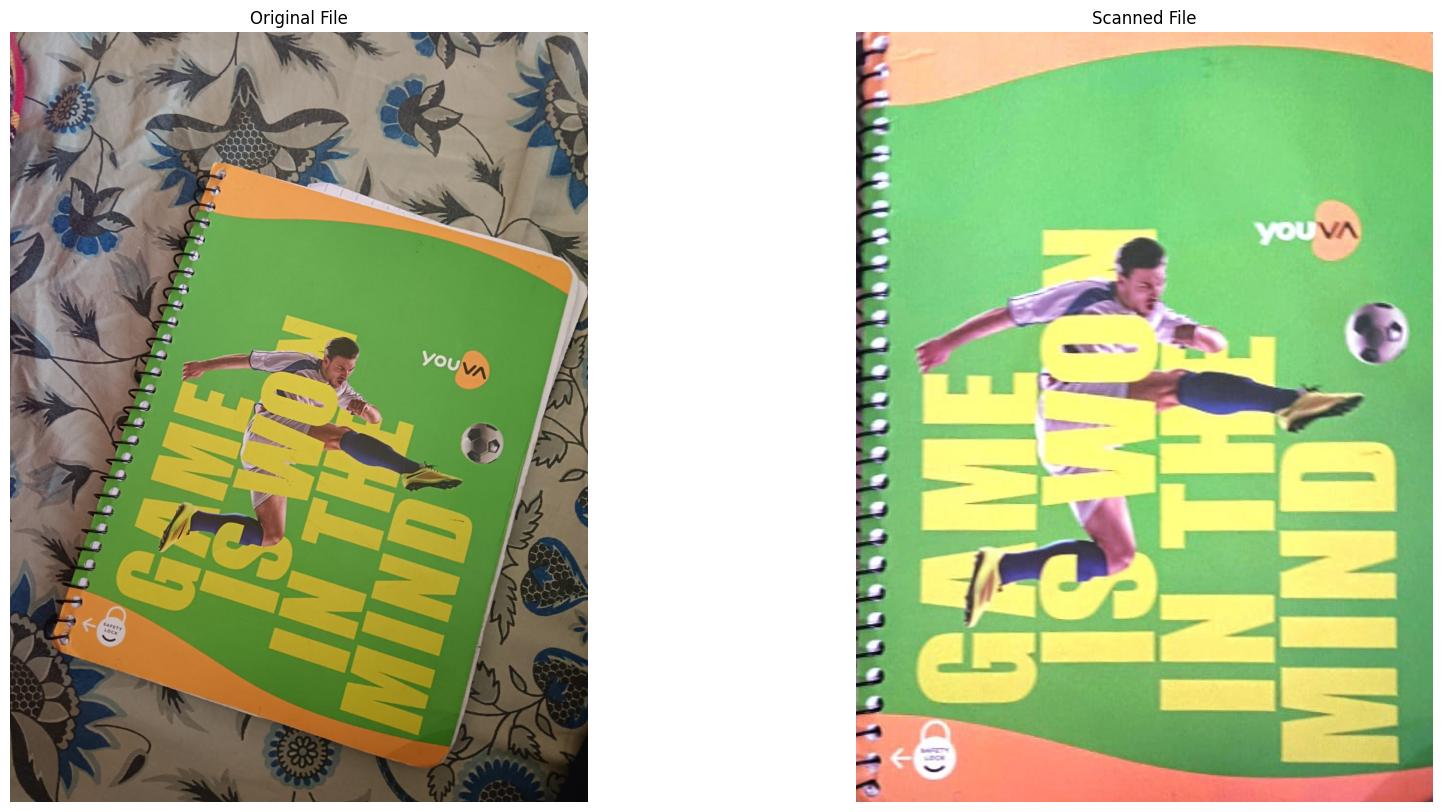

In [20]:

plt.figure(figsize=[20,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1); plt.title("Original File")
plt.subplot(122); plt.axis('off'); plt.imshow(im2); plt.title("Scanned File")
plt.show()

In [21]:
im1_gray=cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
im2_gray=cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)
MAX_NUM_FEATURES=500
orb=cv2.ORB_create(MAX_NUM_FEATURES)
keypoints1, descriptors1=orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2=orb.detectAndCompute(im2_gray, None)
im1_display=cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display=cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

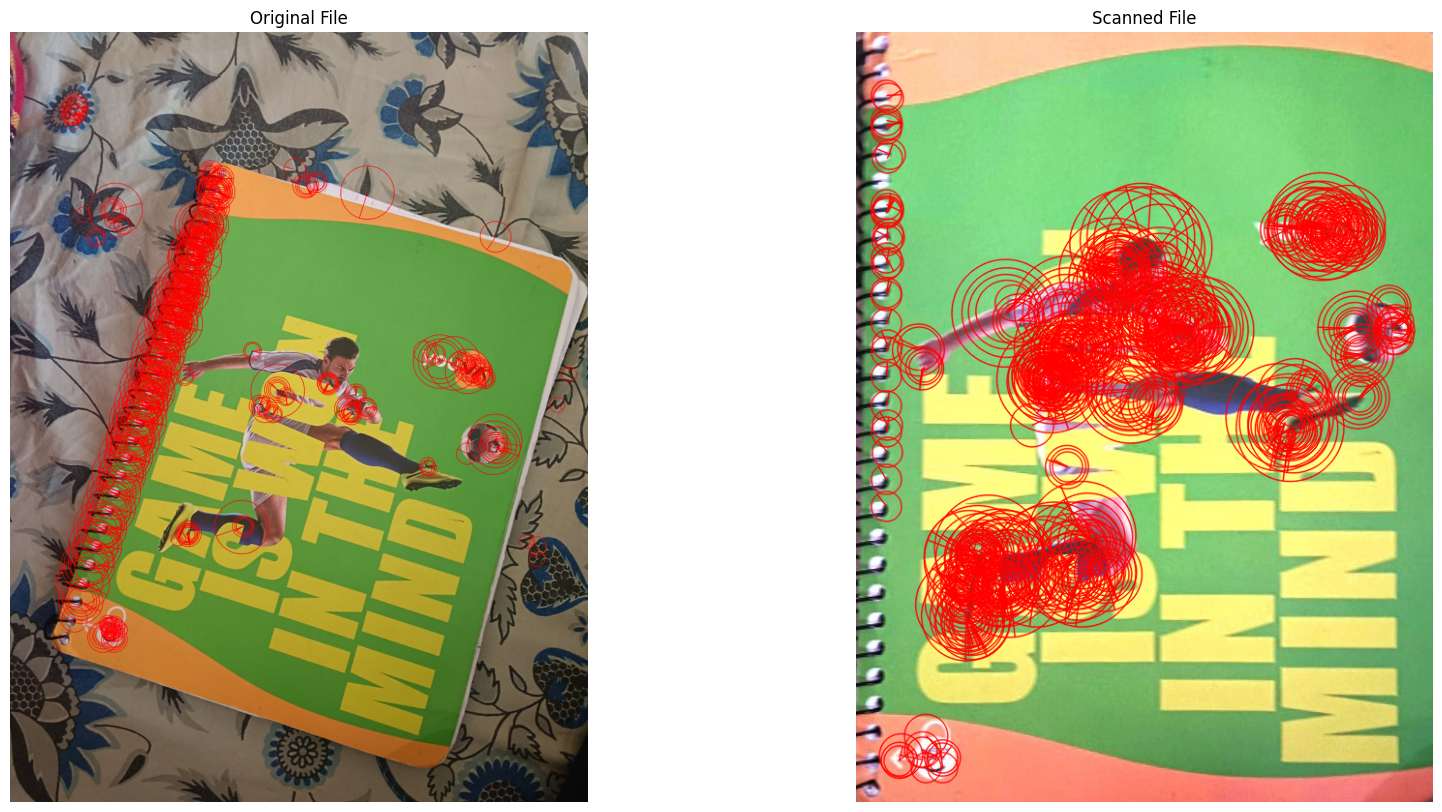

In [22]:
plt.figure(figsize=[20,10]);
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original File")
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned File")
plt.show()

In [23]:
matcher=cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches=matcher.match(descriptors1, descriptors2, None)
matches=list(matches)
matches.sort(key=lambda x: x.distance, reverse=False)
numGoodMatches=int(len(matches)*0.1)
matches=matches[:numGoodMatches]

((-0.5, 1795.5, 1599.5, -0.5), Text(0.5, 1.0, 'Scanned file'))

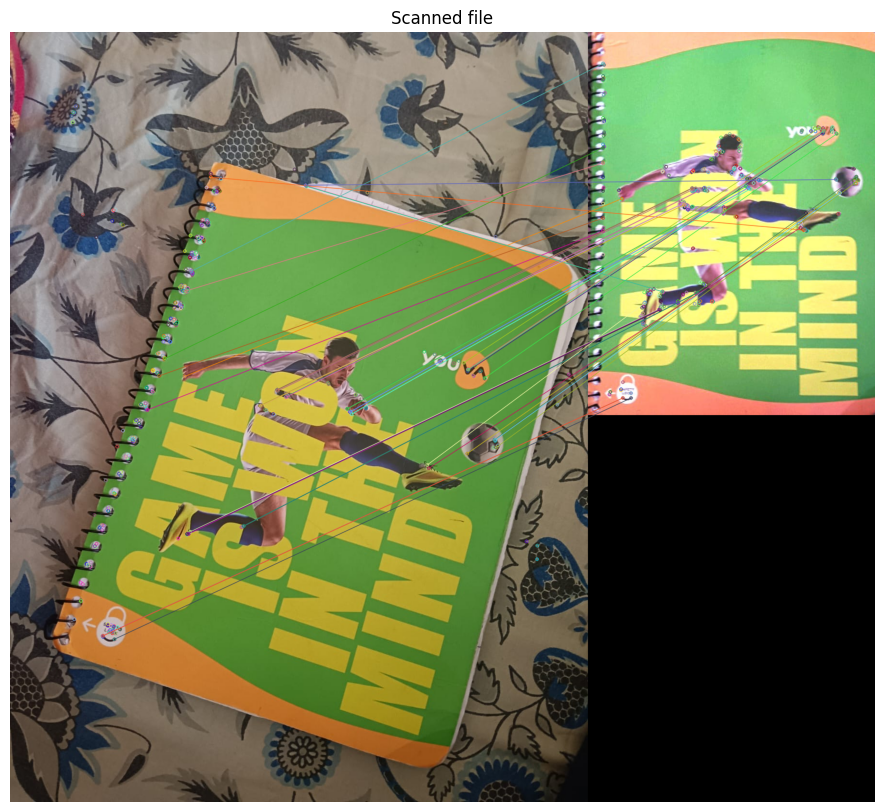

In [25]:
im_matches=cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)
plt.figure(figsize=[40,10])
plt.imshow(im_matches);
plt.axis('off'),plt.title("Scanned file")

In [33]:
points1=np.zeros((len(matches),2), dtype=np.float32)
points2=np.zeros((len(matches),2), dtype=np.float32)
for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

h,mask=cv2.findHomography(points1, points2, cv2.RANSAC)

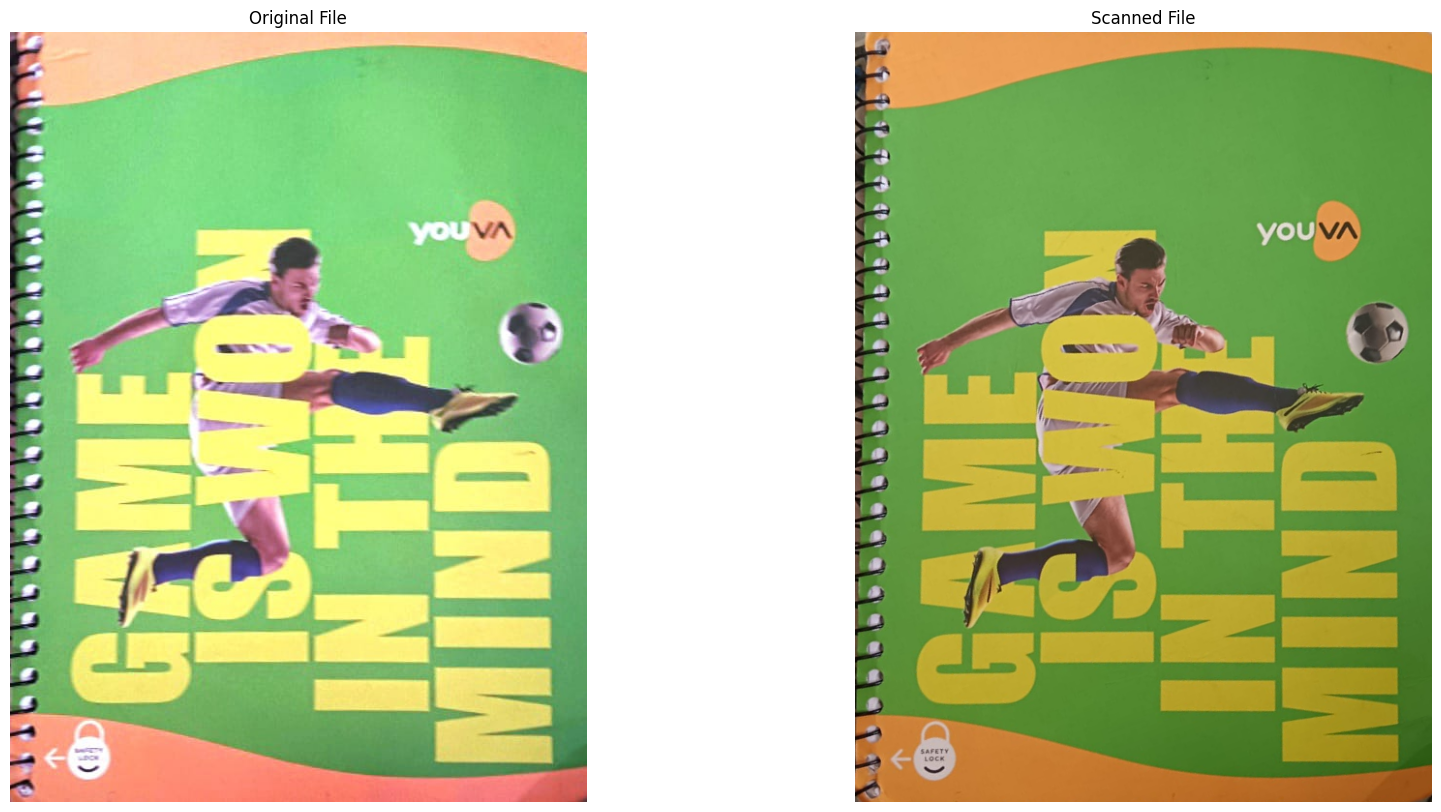

In [34]:
height, width, channel=im2.shape
im1_reg=cv2.warpPerspective(im1, h, (width, height))
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im2); plt.title("Original File")
plt.subplot(122); plt.axis('off'); plt.imshow(im1_reg); plt.title("Scanned File")
plt.show()